In [109]:
import os, sys
import itertools

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at
import astropy.units as u
from astropy import table
from astropy.table import join,vstack,Table
from astropy.coordinates import SkyCoord
from scipy import stats

from analyze_cluster_output import colors, shapes
from analyze_cluster_output import mass_to_bp_rp, id_solar
from analyze_cluster_output import read_cluster_visual
from plot_periods import plot_periodcolor_histogram

In [68]:
clusters = ["IC_2391","Collinder_135","NGC_2451A","NGC_2547","IC_2602"]
dates = ["2021-06-22","2021-06-18","2021-06-21","2021-06-21","2021-07-02"]

In [140]:
i = 0
cat = read_cluster_visual(clusters[i],dates[i],return_periodcolor=False)
print(cat.dtype)

[('TIC', '<i8'), ('provenance_name', '<U5'), ('flux_cols', '<U8'), ('sequence_number', '<i8'), ('obs_id', '<U77'), ('productFilename', '<U82'), ('author', '<U5'), ('fund_periods', '<f8'), ('fund_powers', '<f8'), ('sig_periods', '<f8'), ('sig_powers', '<f8'), ('sec_periods', '<f8'), ('sec_powers', '<f8'), ('thresholds', '<f8'), ('tics', '<i8'), ('num_sig_peaks', '<i8'), ('harm_types', '<U10'), ('clean60', '<U5'), ('clean30', '<U5'), ('clean10', '<U5'), ('clean', '<U5'), ('half', '<i8'), ('dbl', '<i8'), ('period_short', '<f8'), ('power_short', '<f8'), ('SpotEvol', '<U1'), ('MultiProt', '<U1'), ('Blended', '<U1'), ('Q', '<i8'), ('Q2', '<i8'), ('Q3', '<i8'), ('Select', '<U1'), ('Notes', '<U108'), ('final_period', '<f8'), ('final_Q', '<i8'), ('angDist', '<f8'), ('GAIAEDR3_ID', '<i8'), ('GAIAEDR3_RA', '<f8'), ('GAIAEDR3_DEC', '<f8'), ('GAIAEDR3_PMRA', '<f8'), ('GAIAEDR3_PMDEC', '<f8'), ('GAIAEDR3_G', '<f8'), ('GAIAEDR3_BP', '<f8'), ('GAIAEDR3_RP', '<f8'), ('GAIAEDR3_RUWE', '<f8'), ('GAIAEDR3

In [126]:
cat2 = read_cluster_visual(clusters[i],dates[i],return_periodcolor=False,which=2)

In [127]:
cat_init = at.read(f"{clusters[i]}_crossmatch_xmatch_TIC.csv")
print(len(cat_init),len(np.unique(cat_init["TIC"])))
print(len(cat_init),len(np.unique(cat_init["GAIAEDR3_ID"])))
print(cat_init.dtype)

344 329
344 327
[('angDist', '<f8'), ('TMASS_ID', '<i8'), ('UKIDSS_ID', '<i8'), ('GAIAEDR3_ID', '<i8'), ('GAIADR2_G', '<i8'), ('GAIADR2_BP', '<i8'), ('GAIADR2_RP', '<i8'), ('GAIAEDR3_G', '<f8'), ('GAIAEDR3_BP', '<f8'), ('GAIAEDR3_RP', '<f8'), ('GAIADR2_PARALLAX', '<i8'), ('GAIADR2_PARALLAX_ERROR', '<i8'), ('GAIADR2_RUWE', '<i8'), ('GAIAEDR3_RA', '<f8'), ('GAIAEDR3_DEC', '<f8'), ('GAIAEDR3_PARALLAX', '<f8'), ('GAIAEDR3_PARALLAX_ERROR', '<f8'), ('GAIAEDR3_PMRA', '<f8'), ('GAIAEDR3_PMDEC', '<f8'), ('GAIAEDR3_PMRA_ERROR', '<f8'), ('GAIAEDR3_PMDEC_ERROR', '<f8'), ('GAIAEDR3_RUWE', '<f8'), ('GAIAEDR3_G_CORRECTED', '<f8'), ('GAIAEDR3_PARALLAX_CORRECTED', '<f8'), ('HDBscan_MemProb', '<f8'), ('HDBscan_Cluster', '<f8'), ('HDBscan_Stability', '<f8'), ('MemBool', '<f8'), ('angDist_GES', '<f8'), ('target', '<U16'), ('filter', '<f8'), ('cluster', '<U6'), ('S/N', '<f8'), ('Teff', '<i8'), ('logg', '<f8'), ('gamma', '<f8'), ('Ks', '<f8'), ('RV_1', '<f8'), ('e_RV', '<f8'), ('logL', '<f8'), ('ra_epoch200

In [128]:
uniq_gid, gid_cts = np.unique(cat_init["GAIAEDR3_ID"],return_counts=True)

In [129]:
for gid in uniq_gid[gid_cts>1]:
    loc = cat_init["GAIAEDR3_ID"]==gid
    print("\n",gid)
    print(cat_init["angDist_GES","angDist_Cantat-Gaudin","TIC","GAIAEDR3_G","Gmag","Tmag"][loc])


 5317095677665612416
angDist_GES angDist_Cantat-Gaudin    TIC    GAIAEDR3_G   Gmag    Tmag 
----------- --------------------- --------- ---------- -------- ------
         --              0.902047 811930273   17.67839 16.04138 17.201
         --              0.902047 122183696   17.67839 16.04138 14.506

 5317367287103191680
angDist_GES angDist_Cantat-Gaudin    TIC        GAIAEDR3_G     Gmag  Tmag 
----------- --------------------- --------- ------------------ ---- ------
         --                    --  45974257 15.500006876307939   -- 13.763
         --                    -- 812094599 15.500006876307939   -- 15.766

 5318083863752072960
angDist_GES angDist_Cantat-Gaudin    TIC        GAIAEDR3_G     Gmag  Tmag 
----------- --------------------- --------- ------------------ ---- ------
         --                    -- 812401294 13.984614740965608   -- 13.532
         --                    --  93271017 13.984614740965608   -- 12.233

 5318186565006999040
angDist_GES angDist_Cantat-G

In [130]:
all_uniq = table.unique(cat_init,silent=True)

In [131]:
print(len(cat_init),len(all_uniq))
uniq_tic, tic_cts = np.unique(all_uniq["TIC"],return_counts=True)
print(len(uniq_tic))

344 341
329


In [132]:
for tic in uniq_tic[tic_cts>1]:
    loc = all_uniq["TIC"]==tic
    print("\n",all_uniq["GAIAEDR3_ID","GAIA","angDist_GES","angDist_Cantat-Gaudin"][loc])
    print(all_uniq["TIC","GAIAEDR3_G","Gmag","Gmag_1","Tmag"][loc])


     GAIAEDR3_ID             GAIA        angDist_GES angDist_Cantat-Gaudin
------------------- ------------------- ----------- ---------------------
5321648308652754176 5321648308652754176          --                    --
5321648308646791424 5321648308652754176          --                    --
  TIC        GAIAEDR3_G     Gmag  Gmag_1  Tmag 
-------- ------------------ ---- ------- ------
93265315 16.364179430789957   -- 16.3367 15.114
93265315  16.56180277317776   -- 16.3367 15.114

     GAIAEDR3_ID             GAIA        angDist_GES angDist_Cantat-Gaudin
------------------- ------------------- ----------- ---------------------
5318186565011453056 5318186565011453056          --              0.008355
5318186565006999040 5318186565011453056          --              0.936698
  TIC        GAIAEDR3_G        Gmag    Gmag_1  Tmag 
-------- ------------------ --------- ------- ------
93268062 15.693617602037284 15.715745 15.7157 14.378
93268062  19.18541741224081 15.715745 15.7157 14.378


In [138]:
gaia_mismatch = all_uniq["GAIAEDR3_ID"]!=all_uniq["GAIA"]
dup_tic = uniq_tic[tic_cts>1]
print(np.isin(dup_tic,all_uniq["TIC"][gaia_mismatch]))
print(np.isin(all_uniq["TIC"][gaia_mismatch],dup_tic))

[ True  True  True  True  True  True  True  True  True  True  True  True]
[False  True False False False False False False False  True False  True
  True  True  True  True False  True  True  True  True  True  True]


In [139]:
gaia_mismatch_not_dup = np.isin(all_uniq["TIC"][gaia_mismatch],dup_tic)==False
all_uniq[gaia_mismatch[gaia_mismatch_not_dup]].show_in_notebook()

idx,angDist,TMASS_ID,UKIDSS_ID,GAIAEDR3_ID,GAIADR2_G,GAIADR2_BP,GAIADR2_RP,GAIAEDR3_G,GAIAEDR3_BP,GAIAEDR3_RP,GAIADR2_PARALLAX,GAIADR2_PARALLAX_ERROR,GAIADR2_RUWE,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_RUWE,GAIAEDR3_G_CORRECTED,GAIAEDR3_PARALLAX_CORRECTED,HDBscan_MemProb,HDBscan_Cluster,HDBscan_Stability,MemBool,angDist_GES,target,filter,cluster,S/N,Teff,logg,gamma,Ks,RV_1,e_RV,logL,ra_epoch2000_GES,dec_epoch2000_GES,PLX,e_PLX,VRA,e_VRA,VDec,e_VDec,RV_2,SRV,Gflag,prob_p,p_filter,angDist_Cantat-Gaudin,RA_ICRS,DE_ICRS,GaiaDR2,Plx,pmRA*,pmDE,RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,ra_epoch2000_Cantat-Gaudin,dec_epoch2000_Cantat-Gaudin,TIC,RAdeg,DEdeg,HIP,TYC,UCAC4,2MASS,objID,WISEA,GAIA,APASS,KIC,S/G,Ref,r_Pos,pmRA,e_pmRA,pmDE_1,e_pmDE,r_pm,Plx_1,e_Plx,Vmag,e_Vmag,Gmag_1,e_Gmag,Tmag,e_Tmag,f_Tmag,Flag,Teff_1,s_Teff,logg_1,s_logg,[M/H],e_[M/H],Rad,s_Rad,Mass,s_Mass,Dist,s_Dist,E(B-V),s_E(B-V),e_Dist,E_Dist,RAOdeg,DEOdeg
0,0.016037,1889875770193768788,0,5318336717069210880,--,--,--,16.057439105151555,17.25988297578488,14.464485413591948,--,--,--,132.19070377828675,-53.31777142004709,6.4658582877306054,0.05136088,-25.82643939462875,22.79024147028263,0.062876366,0.06434009,0.91718805,16.034823232301907,6.4658582877306054,0.7132953569090982,0.0,0.24671625890317983,1.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.002053,132.19070985295,-53.31777456953,5318336717069210880,6.43233523397604,-25.9354727340498,22.8525329451109,--,205,16.053616,2.7451887,1.0,IC_2391,3948.4478,132.19089592589,-53.31787270985,145384748,132.190699,-53.317768,--,--,184-021966,08484576-5319039,--,J084845.73-531903.8,--,--,--,STAR,tmmgaia,tmmgaia,--,--,--,--,--,--,--,--,--,--,--,13.947,0.018,gaiaj,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,132.1905,-53.31768
1,0.058453,0,0,5318111557703219584,--,--,--,20.639759875123715,--,18.90149753727419,--,--,--,130.06663702372458,-53.43037652394643,-2.409434570138042,0.9314266,0.30089071250196797,0.3533795539455851,1.7527683,1.4427208,1.0241297,20.639727,-2.409434570138042,0.0,-2.0,0.0,0.0,1.924539,08401609-5325476,665.0,IC2391,11.44,3112,4.976,0.877,12.955,14.99,0.88,-2.04,130.06663477919,-53.43037809452,6.37,0.09,-17.53,0.12,16.95,0.14,14.99,1.37,1,0.9999,0.9999,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,812411718,130.06662245192,-53.43036280292,--,--,--,--,--,--,5318111553397409024,--,--,STAR,gaia2,gaia2,2.003,2.846,-3.225,3.285,gaia2,-3.2876,1.12,20.648,0.049,20.630199,0.016543,20.827,0.031,rered,gaia2,--,--,--,--,--,--,--,--,--,--,5125.1602,3119.1201,0.537,0.0181,2404.3401,3833.9099,130.06663693004,-53.43037668868
2,0.514866,1980035723671396596,0,5318114615719980288,--,--,--,15.246423257378705,16.266412602491872,13.530693269633844,--,--,--,129.79149151449278,-53.398774217226666,7.666752496945992,0.48800638,-26.28893970797695,23.80299427280208,0.5899451,0.49344766,8.716167,15.232037563090772,7.666752496945992,0.3560660927452426,0.0,0.24671625890317983,1.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,93272395,129.79169907026,-53.39884590668,--,--,184-020012,08391000-5323558,--,J083909.97-532355.5,5318114615717938816,--,--,STAR,tmgaia2,tmgaia2,-27.602,2.939,16.622,2.94,hsoy,--,--,16.262,0.137,14.9011,0.006997,13.758,0.009,gbprp,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,129.79149975166,-53.39877434034
3,0.535087,1980035723671405895,0,5318117330136955392,--,--,--,7.214329396758313,7.189920723119403,7.202876029829753,--,--,--,129.99720420817133,-53.260852260523976,6.547015227246705,0.03512863,-23.783232701764515,24.012085634139314,0.040091615,0.043413047,0.9582509,7.2142963,6.547015227246705,0.9178441775018298,0.0,0.24671625890317983,1.0,0.217415,08395937-5315394,520.0,IC2391,278.35,10200,3.9,-999.0,7.16,16.12,3.0,1.49,129.99738091884,-53.26095898077,6.51,0.05,-17.13,0.08,17.11,0.09,16.12,3

In [114]:
print(len(cat),len(cat2))
print(cat.dtype)
print(len(np.unique(cat["TIC"])))

216 215
[('TIC', '<i8'), ('provenance_name', '<U5'), ('flux_cols', '<U8'), ('sequence_number', '<i8'), ('obs_id', '<U77'), ('productFilename', '<U82'), ('author', '<U5'), ('fund_periods', '<f8'), ('fund_powers', '<f8'), ('sig_periods', '<f8'), ('sig_powers', '<f8'), ('sec_periods', '<f8'), ('sec_powers', '<f8'), ('thresholds', '<f8'), ('tics', '<i8'), ('num_sig_peaks', '<i8'), ('harm_types', '<U10'), ('clean60', '<U5'), ('clean30', '<U5'), ('clean10', '<U5'), ('clean', '<U5'), ('half', '<i8'), ('dbl', '<i8'), ('period_short', '<f8'), ('power_short', '<f8'), ('SpotEvol', '<U1'), ('MultiProt', '<U1'), ('Blended', '<U1'), ('Q', '<i8'), ('Q2', '<i8'), ('Q3', '<i8'), ('Select', '<U1'), ('Notes', '<U86'), ('final_period', '<f8'), ('final_Q', '<i8'), ('angDist', '<f8'), ('GAIAEDR3_ID', '<i8'), ('GAIAEDR3_RA', '<f8'), ('GAIAEDR3_DEC', '<f8'), ('GAIAEDR3_PMRA', '<f8'), ('GAIAEDR3_PMDEC', '<f8'), ('GAIAEDR3_G', '<f8'), ('GAIAEDR3_BP', '<f8'), ('GAIAEDR3_RP', '<f8'), ('GAIAEDR3_RUWE', '<f8'), ('G

In [72]:
missing1 = np.setdiff1d(cat["TIC"],cat2["TIC"])
missing2 = np.setdiff1d(cat2["TIC"],cat["TIC"])

In [73]:
allcat = join(cat,cat2,keys=["TIC"])

Text(0.5, 1.0, 'NGC_2547')

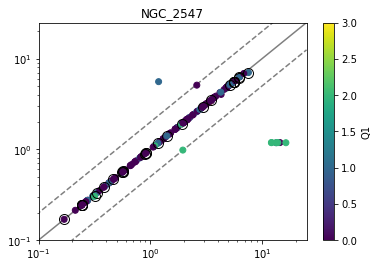

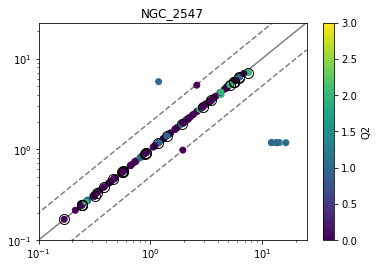

In [74]:
plt.figure()
good = (allcat["final_Q_1"]<=1) | (allcat["final_Q_2"]<=1)
multi = ((allcat["MultiProt_1"]=="y") | (allcat["MultiProt_1"]=="m") |
        (allcat["MultiProt_2"]=="y") | (allcat["MultiProt_2"]=="m"))
plt.scatter(allcat["final_period_1"][good],allcat["final_period_2"][good],
            c=allcat["final_Q_1"][good],vmax=3)

plt.plot(allcat["final_period_1"][multi],allcat["final_period_2"][multi],
         'ko',ms=10,mfc="none")

plt.xlim(0.1,25)
plt.ylim(0.1,25)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Q1")

x = np.linspace(0.1,25,10)
plt.plot(x,x,'k-',zorder=-2,alpha=0.5)
plt.plot(x/2,x,'k--',zorder=-2,alpha=0.5)
plt.plot(x,x/2,'k--',zorder=-2,alpha=0.5)
plt.title(clusters[i])

plt.figure()
plt.scatter(allcat["final_period_1"][good],allcat["final_period_2"][good],
            c=allcat["final_Q_2"][good],vmax=3)

plt.plot(allcat["final_period_1"][multi],allcat["final_period_2"][multi],
         'ko',ms=10,mfc="none")
plt.xlim(0.1,25)
plt.ylim(0.1,25)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Q2")

x = np.linspace(0.1,25,10)
plt.plot(x,x,'k-',zorder=-2,alpha=0.5)
plt.plot(x/2,x,'k--',zorder=-2,alpha=0.5)
plt.plot(x,x/2,'k--',zorder=-2,alpha=0.5)
plt.title(clusters[i])

163
141


Text(0.5, 1.0, 'NGC_2547')

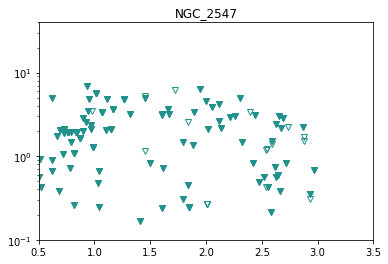

In [75]:
consistently_good = (allcat["final_Q_1"]<=1) & (allcat["final_Q_2"]<=1)
print(len(np.where(consistently_good)[0]))

consistently_best = (allcat["final_Q_1"]==0) & (allcat["final_Q_2"]==0)
print(len(np.where(consistently_best)[0]))

bp_rp = allcat["GAIAEDR3_BP_1"]-allcat["GAIAEDR3_RP_1"]
plt.plot(bp_rp[consistently_good],allcat["final_period_1"][consistently_good],
         shapes[clusters[i]],mfc="None",color=colors[clusters[i]])
plt.plot(bp_rp[consistently_best],allcat["final_period_1"][consistently_best],
         shapes[clusters[i]],color=colors[clusters[i]])
plt.ylim(0.1,40)
plt.xlim(0.5,3.5)
plt.yscale("log")
plt.title(clusters[i])

# Now bring in membership

In [76]:
# all_memb = ((allcat["MemBool_1"]==1.0) & (allcat["MemBool_1"].mask==False) &
#             (allcat["prob_p_1"]>0) & (allcat["prob_p_1"].mask==False) & 
#             (allcat["proba_1"].mask==False))

204 total members
140 with consistently good periods


Text(0.5, 1.0, 'NGC_2547')

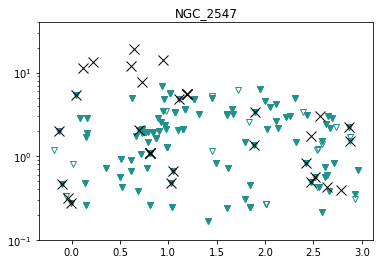

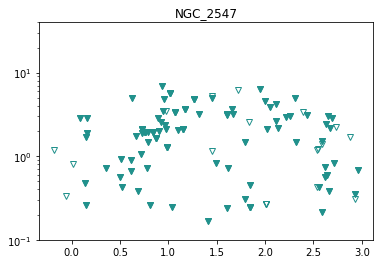

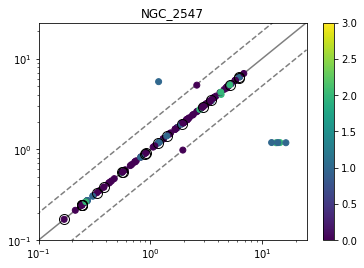

In [77]:
m1 = np.asarray((allcat["MemBool_1"]==1.0) & (allcat["MemBool_1"].mask==False),int)
m3 = np.asarray((allcat["proba_1"].mask==False),int)

if clusters[i]!="Collinder_135":
    m2 = np.asarray((allcat["prob_p_1"]>0) & (allcat["prob_p_1"].mask==False),int)
    all_memb = (m1+m2+m3)>=2
else:
    all_memb = (m1+m3)>=1
    
    
bp_rp = allcat["GAIAEDR3_BP_1"]-allcat["GAIAEDR3_RP_1"]
plt.plot(bp_rp[consistently_good],allcat["final_period_1"][consistently_good],
         shapes[clusters[i]],mfc="None",color=colors[clusters[i]])
plt.plot(bp_rp[consistently_best],allcat["final_period_1"][consistently_best],
         shapes[clusters[i]],color=colors[clusters[i]])
plt.plot(bp_rp[~all_memb],allcat["final_period_1"][~all_memb],'kx',ms=10)
plt.ylim(0.1,40)
plt.yscale("log")
plt.title(clusters[i])

print(len(np.where(all_memb)[0]),"total members")
print(len(np.where(all_memb & consistently_good)[0]),"with consistently good periods")

plt.figure()
bp_rp = allcat["GAIAEDR3_BP_1"]-allcat["GAIAEDR3_RP_1"]
plt.plot(bp_rp[all_memb & consistently_good],allcat["final_period_1"][all_memb & consistently_good],
         shapes[clusters[i]],mfc="None",color=colors[clusters[i]])
plt.plot(bp_rp[all_memb & consistently_best],allcat["final_period_1"][all_memb & consistently_best],
         shapes[clusters[i]],color=colors[clusters[i]])
plt.ylim(0.1,40)
plt.yscale("log")
plt.title(clusters[i])
# ax = plt.gca()
# ax.axhline(4.5)


plt.figure()
plt.scatter(allcat["final_period_1"][good & all_memb],allcat["final_period_2"][good & all_memb],
            c=allcat["final_Q_2"][good & all_memb],vmax=3)

plt.plot(allcat["final_period_1"][multi & all_memb],allcat["final_period_2"][multi & all_memb],
         'ko',ms=10,mfc="none")
plt.xlim(0.1,25)
plt.ylim(0.1,25)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()

x = np.linspace(0.1,25,10)
plt.plot(x,x,'k-',zorder=-2,alpha=0.5)
plt.plot(x/2,x,'k--',zorder=-2,alpha=0.5)
plt.plot(x,x/2,'k--',zorder=-2,alpha=0.5)
plt.title(clusters[i])

# Now consider proximity

Text(0.5, 1.0, 'NGC_2547 P2')

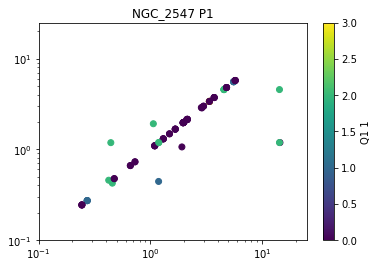

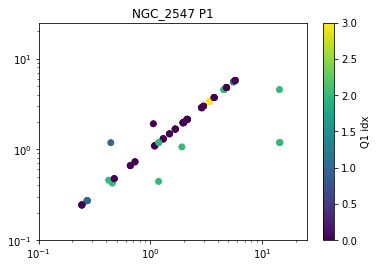

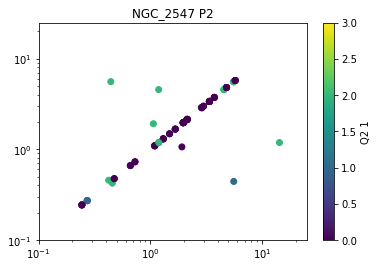

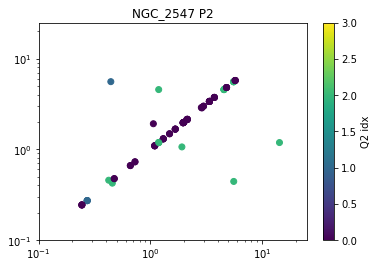

In [78]:
gpos = SkyCoord(allcat["GAIAEDR3_RA_1"],allcat["GAIAEDR3_DEC_1"],unit=u.degree)
idx, sep, _ = gpos.match_to_catalog_sky(gpos,nthneighbor=2)
same_pixel = sep<(30*u.arcsec)
np.where(same_pixel)[0]

plt.figure()
plt.scatter(allcat["final_period_1"][same_pixel],allcat["final_period_1"][idx[same_pixel]],
        c=allcat["final_Q_1"][same_pixel],vmax=3)
plt.xlim(0.1,25)
plt.ylim(0.1,25)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Q1 1")
plt.title(clusters[i]+" P1")

plt.figure()
plt.scatter(allcat["final_period_1"][same_pixel],allcat["final_period_1"][idx[same_pixel]],
        c=allcat["final_Q_1"][idx[same_pixel]],vmax=3)
plt.xlim(0.1,25)
plt.ylim(0.1,25)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Q1 idx")
plt.title(clusters[i]+" P1")

plt.figure()
plt.scatter(allcat["final_period_2"][same_pixel],allcat["final_period_2"][idx[same_pixel]],
        c=allcat["final_Q_2"][same_pixel],vmax=3)
plt.xlim(0.1,25)
plt.ylim(0.1,25)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Q2 1")
plt.title(clusters[i]+" P2")


plt.figure()
plt.scatter(allcat["final_period_2"][same_pixel],allcat["final_period_2"][idx[same_pixel]],
        c=allcat["final_Q_2"][idx[same_pixel]],vmax=3)
plt.xlim(0.1,25)
plt.ylim(0.1,25)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Q2 idx")
plt.title(clusters[i]+" P2")


In [79]:
allcat[same_pixel]["TIC","GAIAEDR3_ID_1","GAIAEDR3_G_1","final_period_1","final_Q_1","Notes_1","final_period_2","final_Q_2","Notes_2"].show_in_notebook()

idx,TIC,GAIAEDR3_ID_1,GAIAEDR3_G_1,final_period_1,final_Q_1,Notes_1,final_period_2,final_Q_2,Notes_2
0,238544148,5514546933561876224,11.398862107569684,0.6616,0,--,0.6615,0,also visible in QLP; blended with TIC 238544151; this looks like the brighter star
1,238544151,5514546937863174784,13.241787472665003,0.6615,0,blended with TIC 238544148; this star is fainter,0.6615,0,blended with TIC 238544148; this looks like the fainter star
2,238563812,--,--,0.9126,0,obvious beat pattern; no gaia plotted,0.9126,0,beat pattern
3,238563945,--,--,-9999.0,3,noise; no gaia plotted,-9999.0,3,--
4,238596169,5514359849089113600,13.702743110973788,2.1415,0,--,2.1415,0,also visible in QLP
5,238596169,5514359849089113600,13.702743110973788,2.1415,0,--,2.1415,0,also visible in QLP
6,238596169,5514359849089113600,13.702743110973788,2.1415,0,--,2.1415,0,also visible in QLP
7,238596169,5514359849089113600,13.702743110973788,2.1415,0,--,2.1415,0,also visible in QLP
8,238596257,5514340568971771008,10.66368265811141,1.187,2,noise; systematics,1.187,2,noise/systematics
9,238596257,5514340568971771008,10.66368265811141,14.4494,0,signal in PCA1 but blended with others,1.187,2,noise/systematics
